## Week 5: Introduction to Statistics using Python (Part 3)  

In this section we will cover the basics of linear regression. In statistics, linear regression is a linear approach to modeling the relationship between a scalar response (or dependent variable) and one or more explanatory variables (or independent variables). In other words, linear regression is used to predict a continuous outcome variable (y) based on the value of one or multiple predictor variables (x). Based on its name, it should come as no shock that linear regression assumes a linear relationship between the outcome and the predictor variables. 

Linear regression builds a mathematical equation of the form **Y = a + b1X1 + b2X2 + ... + bnXi** where a is the intercept and b1 up to bn are regression coefficients or weights. This equation can be used to predict the outcome variable (y) using new values of the predictor variables (x). 

The case of considering one explanatory variable is called simple linear regression, while the case where we consider multiple explanatory or independent variables is called multiple linear regression. A simple linear regression line has an equation of the form **Y = a + bX**, where X is the explanatory variable and Y is the dependent variable. The slope of the line is b, and a is the intercept (the value of y when x = 0). 

Some things to note include: 

* The linear regression coefficients (slopes) are determined so that the error in predicting the outcome value is minimized. Ordinary Least Squares is used to compute these coefficients.  

* Predictor variables can be both continuous and categorical.  

* In some cases, the relationship between the outcome and the predictor variables is not linear. In these situations, you need to build a non-linear regression, such as polynomial or spline regression. 

Let's start with simple linear regression analysis. We are going to use data about death rate (continuous variable) and how it depends on the availability of doctors, hospitals, income and population density (source: Life in America's Small Cities, by G.S. Thomas). 

**Description of the Data:** 

* death_rate = death rate per 1000 residents 

* doctors = doctor availability per 100,000 residents 

* hospitals = hospital availability per 100,000 residents 

* income = annual per capita income in thousands of dollars 

* pop_density = population density people per square mile 

We are going to predict death rate based on other variables in dataset. 

In [16]:
# Load up Python modules
import matplotlib.pyplot as plt # Used for data visualisations
import pandas as pd # For creation of dataframes and associated operations
import seaborn as sns # For Data Visualisation
import statsmodels.api as sm # For linear regression modelling 
from numpy.polynomial.polynomial import polyfit # For plotting line of best fit

In [17]:
# Read data from file 'linreg.txt'
data = pd.read_csv("Datasets/linreg.txt", sep="\t") 

# Preview the first 5 lines of the loaded data 
print(data.head())

# Rename columns and check that they have been renamed properly 
data.columns = ['death_rate', 'doctors', 'hospitals', 'income', 
                'pop_density']
print(data.head())

     X1  X2    X3   X4   X5
0   8.0  78   284  9.1  109
1   9.3  68   433  8.7  144
2   7.5  70   739  7.2  113
3   8.9  96  1792  8.9   97
4  10.2  74   477  8.3  206
   death_rate  doctors  hospitals  income  pop_density
0         8.0       78        284     9.1          109
1         9.3       68        433     8.7          144
2         7.5       70        739     7.2          113
3         8.9       96       1792     8.9           97
4        10.2       74        477     8.3          206


### Data Visualisation 
First, we are going to visualise our data using scatterplots. A scatterplot is a type of data visualisation that shows the relationship between two numerical variables, in this case death_rate and the predictor variables.

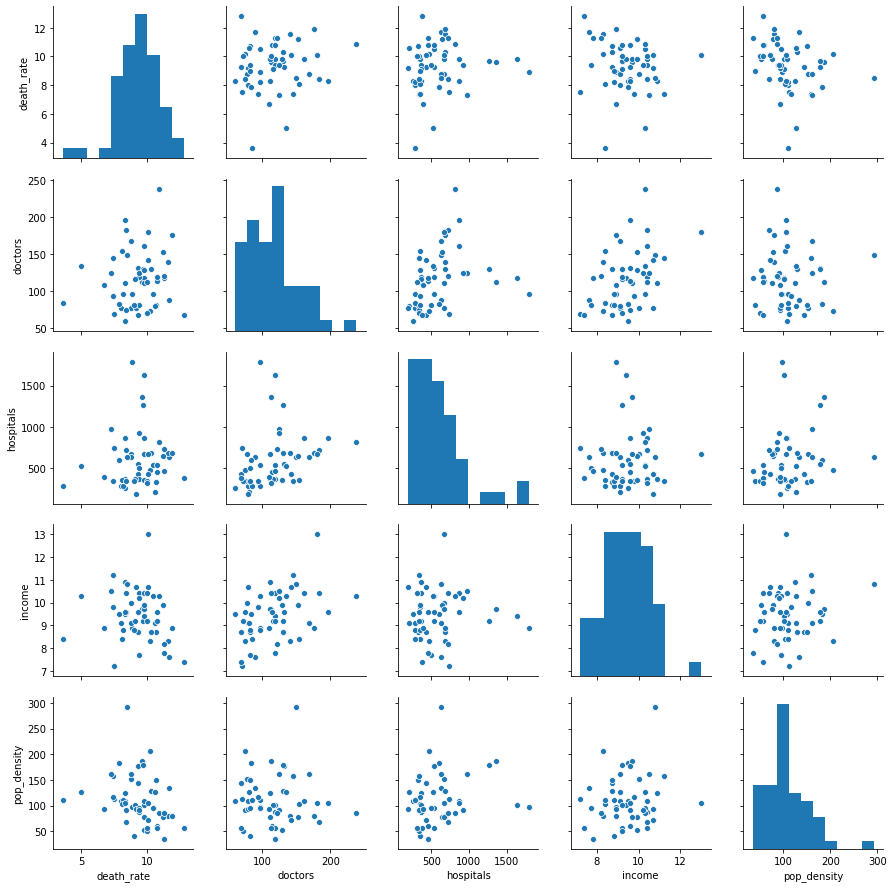

In [18]:
sns.pairplot(data);

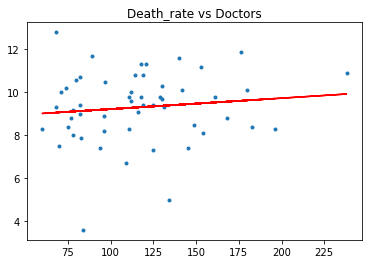

In [19]:
# Now let's view each predictor variable against death_rate 
# In each scatterplot below, the line of best fit is displayed in red.

# Data
death_rate = data.iloc[:,0]
doctors = data.iloc[:,1]
hospitals = data.iloc[:,2]
income = data.iloc[:,3]
pop_density = data.iloc[:,4]

# Plot 1 death_rate and doctors 
# Fit with polyfit
b, m = polyfit(doctors, death_rate, 1)

plt.plot(doctors, death_rate, '.')
plt.plot(doctors, b + m * doctors, '-', color="r")
plt.title("Death_rate vs Doctors");

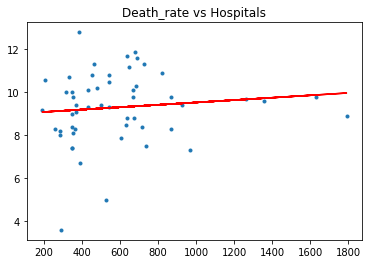

In [20]:
# Plot 2 death_rate and hospitals

# Fit with polyfit
b, m = polyfit(hospitals, death_rate, 1)

plt.plot(hospitals, death_rate, '.')
plt.plot(hospitals, b + m * hospitals, '-', color="r")
plt.title("Death_rate vs Hospitals");

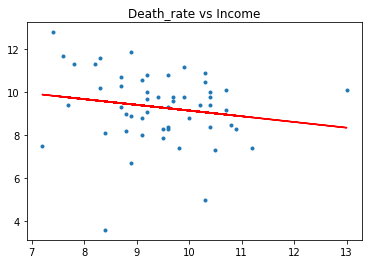

In [21]:
# Plot 3 death_rate and income

# Fit with polyfit
b, m = polyfit(income, death_rate, 1)

plt.plot(income, death_rate, '.')
plt.plot(income, b + m * income, '-', color="r")
plt.title("Death_rate vs Income");

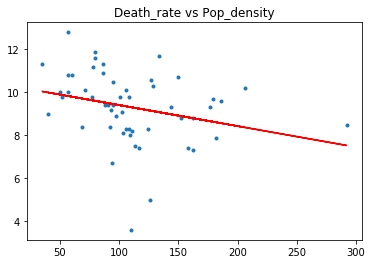

In [22]:
# Plot 4 death_rate and pop_density

# Fit with polyfit
b, m = polyfit(pop_density, death_rate, 1)

plt.plot(pop_density, death_rate, '.')
plt.plot(pop_density, b + m * pop_density, '-', color="r")
plt.title("Death_rate vs Pop_density");

From the above scatterplots it appears that there may be linear relationships between death_rate and the other predictors in our data. To further explore this, a linear regression analysis should be carried out.  

### Simple Linear Regression 
Let's start with a simple model with only one predictor. In this case we are going to use income as our predictor. 

In [23]:
# Define the data/predictors as the pre-set feature names  
df = pd.DataFrame(data.iloc[:,1:5])

# Put the target (death_rate) in another DataFrame
target = pd.DataFrame(data, columns=["death_rate"])

# Define our x and y
X = df["income"]
y = target["death_rate"]
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() # build the model using Ordinary Least Squares method
#predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             death_rate   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.555
Date:                Fri, 08 May 2020   Prob (F-statistic):              0.218
Time:                        15:19:57   Log-Likelihood:                -100.85
No. Observations:                  53   AIC:                             205.7
Df Residuals:                      51   BIC:                             209.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8145      2.025      5.835      0.000       7.749      15.880
income        -0.2659      0.213     -1.247      0.218      -0.694       0.162
==============================================================================
Omnibus:                       15.909   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.766
Skew:                          -1.078   Prob(JB):                     3.09e-05
Kurtosis:                       5.180   Cond. No.                         85.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the above output we have the regression formula for death_rate:  

death_rate = a + bX  

death_rate = 11.8145 + (-0.2659 * income)  

**This formula gives us some information about the relationship between our outcome and predictor:**  

The intercept is equal to 11.8145. The intercept (often labeled the constant) is the expected mean value of Y when all X=0. In this case it can be interpreted as the expected mean death rate (number of deaths per 1000 residents) if income is equal to 0. So, for an income of 0 we might expect 11.8145 deaths per 1000 residents.   

The regression coefficient or slope (b) indicates the steepness of a line. The greater the magnitude of the slope, the steeper the line and the greater the rate of change. So, the slope of a regression line (b) represents the rate of change in y as x changes. In this case the slope for the income variable is -0.2659. Income is represented as annual per capita income in thousands of dollars. So, for an income equal to 1 thousand dollars we can expect a decrease of -0.2659 * 1 units in death rate. In total, death rate would be 11.8145 - 0.2659*1 = 11.5486 units of death rate, which means 11.5486 deaths per 1000 residents. This indicates the higher the income, the lower the death rate, which make sense.   

Now let's plot our data like we did before. As you can see here some of the points are above the black line and some are below it. In order to get an idea of how OLS works, we will add residual errors i.e. the differences between real y and predicted y values as red lines. 

![Regression Errors (Residuals)](Images/regres.png)

Importantly, we need to estimate the usability of the model i.e. how significant is the model and what are impacts of the coefficients. Again you can look at the output of the summary function to get this information.

In [24]:
# Remember what our model was (death_rate and income)
X = df["income"]
y = target["death_rate"]
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() # build the model using Ordinary Least Squares method
#predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             death_rate   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.555
Date:                Fri, 08 May 2020   Prob (F-statistic):              0.218
Time:                        15:19:57   Log-Likelihood:                -100.85
No. Observations:                  53   AIC:                             205.7
Df Residuals:                      51   BIC:                             209.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.8145      2.025      5.835      0.000       7.749      15.880
income        -0.2659      0.213     -1.247      0.218      -0.694       0.162
==============================================================================
Omnibus:                       15.909   Durbin-Watson:                   1.677
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.766
Skew:                          -1.078   Prob(JB):                     3.09e-05
Kurtosis:                       5.180   Cond. No.                         85.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The .summary function gives a wide range of summary outputs for our model, but how do we interpret this table?  

First, we notice details about the model that was fitted i.e. what the dependent variable is, the model and the method. OLS stands for Ordinary Least Squares and the method “Least Squares” means that we’re trying to fit a regression line that would minimize the square of distance from the regression line. Df of residuals and models relates to the degrees of freedom which are the number of values in the final calculation of a statistic that are free to vary.  

The "coef" column shows the regression beta coefficients (slopes) and intercept. The 'std err' column shows the standard error of the coefficients. In the example, the intercept can vary by 2.025 and the slope can vary by 0.213, in case we ran the model again and again. Ideally, we want them to be lower relative to their coefficients. 

The 't value' column shows the t-statistic of the test and the 'P(>|t|)' column shows p-value of this test. The higher the t-statistic and the lower the p-value, the more significant the predictor. 

The hypothesis test for the slope coefficient is: 

**H0:** b = 0 (The slope is equal to zero i.e. there is no link between predictor and outcome) 

**H1:** b != 0 (The slope is not equal to zero i.e. there is a link between predictor and outcome) 

In this example the T-statistic for slope of income is close to zero and the p-value is high (0.218 > 0.05). Therefore, we fail to reject the null hypothesis and conclude that no strong linear relationship between predictor and outcome exists. 

**Other things to note in the output are:** 

The R-squared which represents the proportion of variation in the data explained by model. The higher the R-squared, the better the model. Adjusted R-squared increases when extra explanatory variables are added to the model. In this model R-squared is 0.030 and adjusted R-squared is 0.011, they are considerably low, which means that this model does not have the ability to explain a lot of variability in the outcome data. 

The F-statistic which comes from the F-test. F-test here tests whether any of the independent variables in a multiple linear regression model are significant. In general, it can be also used to test equality of variances in two normal populations. 

**H0:** All coefficients = 0 

**H1:** At least one coefficient is not equal 0 

For this model, we have got p-value: 0.218, which means that we fail to reject the null hypothesis (H0) and conclude all coefficients here are non-significant. 

In conclusion, the predictor that we used (income) is not a good predictor to use to represent the outcome and our model is therefore not suitable.

So, let's try a new/different model and carry out a multiple linear regression with some extra predictors. 

In [25]:
# Let's use all the predictors 
X = df[["doctors", "hospitals", "income", "pop_density"]]
y = target["death_rate"]
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit()

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             death_rate   R-squared:                       0.144
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     2.014
Date:                Fri, 08 May 2020   Prob (F-statistic):              0.107
Time:                        15:19:57   Log-Likelihood:                -97.530
No. Observations:                  53   AIC:                             205.1
Df Residuals:                      48   BIC:                             214.9
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2663      2.020      6.072      0.000       8.204      16.328
doctors         0.0074      0.007      1.066      0.292      -0.007       0.021
hospitals       0.0006      0.001      0.809      0.423      -0.001       0.002
income         -0.3302      0.235     -1.408      0.166      -0.802       0.141
pop_density    -0.0095      0.005     -1.936      0.059      -0.019       0.000
==============================================================================
Omnibus:                       18.172   Durbin-Watson:                   1.590
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               25.184
Skew:                          -1.200   Prob(JB):                     3.40e-06
Kurtosis:                       5.376   Cond. No.                     6.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the above output it appears that only the 'pop_density' predictor seems to be somewhat promising (Pr(>|t|) = 0.059), however this is still over the significance level of 0.05 and the adjusted R-squared (0.072) is still pretty low. The p-value of the F-test is 0.107, which tells us that we fail to reject H0 and conclude that all predictors are not significant.

Note from the warnings displayed above, multicollinearity might be a problem. Multicollinearity refers to a situation in which two or more explanatory variables in a multiple regression model are highly linearly related. Multicollinearity and how to deal with it wont be covered in this tutorial but it is something to be aware of!  

Now how do we compare 2 models? We can use ANOVA for that. It tests whether one model is significantly better at capturing the data than the other model. If the resulting p-value is sufficiently low (usually less than 0.05), we conclude that the first model is significantly better than the second one, and thus favor the first model.

In [26]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm

model1 = ols('death_rate ~ income', data=data).fit()
model2 = ols('death_rate ~ doctors + hospitals + income + pop_density', data=data).fit()
anovaResults = anova_lm(model1, model2)
print(anovaResults);

# As we can see here, Pr(>F) = 0.1084, so we fail to reject H0 and conclude that the two models are not 
# significantly different from each other. In this case we usually choose the simpler one. 

   df_resid         ssr  df_diff    ss_diff         F    Pr(>F)
0      51.0  139.476623      0.0        NaN       NaN       NaN
1      48.0  123.073979      3.0  16.402644  2.132395  0.108409
